In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers
import datetime
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from sklearn.neural_network import BernoulliRBM

MyRBM = BernoulliRBM(n_components=200, n_iter=10, batch_size=10, verbose=1)
X_train = MyRBM.fit_transform(X_train)
X_test = MyRBM.transform(X_test)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -228.89, time = 34.14s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -221.58, time = 36.45s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -216.91, time = 35.29s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -219.06, time = 33.53s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -211.63, time = 33.66s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -212.48, time = 33.58s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -212.08, time = 33.72s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -211.92, time = 37.62s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -215.03, time = 37.97s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -213.77, time = 39.42s


In [7]:
MyRBM = BernoulliRBM(n_components=100, n_iter=10, batch_size=10, verbose=1)
X_train = MyRBM.fit_transform(X_train)
X_test = MyRBM.transform(X_test)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -7.16, time = 3.42s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -7.31, time = 4.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -7.29, time = 4.16s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5.87, time = 4.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -6.38, time = 4.58s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -6.40, time = 4.91s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6.01, time = 5.40s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5.36, time = 4.48s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6.10, time = 4.45s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -5.96, time = 5.04s


In [9]:
X_train = X_train.reshape(X_train.shape[0],10,10,1)
X_test = X_test.reshape(X_test.shape[0],10,10,1)

In [10]:
my_input=layers.Input(shape=(10,10,1))
conv1=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(my_input)
pool1=layers.MaxPool2D(pool_size=2)(conv1)
conv2=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(pool1)
pool2=layers.MaxPool2D(pool_size=2)(conv2)
flat=layers.Flatten()(pool2)
out=layers.Dense(10,activation = 'softmax')(flat)

myModel=Model(my_input,out)

myModel.summary()
myModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dens

In [11]:
start=datetime.datetime.now()
trained_model=myModel.fit(X_train,y_train , batch_size=32 , epochs=5 , validation_split=0.2)
end=datetime.datetime.now()
Total_time_training=end-start

print ('Total_time_training:',Total_time_training )

history=trained_model.history

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 20s 415us/step - loss: 0.7134 - acc: 0.7221 - val_loss: 0.6344 - val_acc: 0.7351
Epoch 2/5
48000/48000 [==============================] - 18s 372us/step - loss: 0.6170 - acc: 0.7467 - val_loss: 0.6223 - val_acc: 0.7422
Epoch 3/5
48000/48000 [==============================] - 17s 359us/step - loss: 0.6020 - acc: 0.7528 - val_loss: 0.6011 - val_acc: 0.7528
Epoch 4/5
48000/48000 [==============================] - 20s 413us/step - loss: 0.5927 - acc: 0.7567 - val_loss: 0.5906 - val_acc: 0.7540
Epoch 5/5
48000/48000 [==============================] - 17s 354us/step - loss: 0.5849 - acc: 0.7593 - val_loss: 0.5858 - val_acc: 0.7623
Total_time_training: 0:01:32.440293


10000/10000 [==============================] - 2s 180us/step


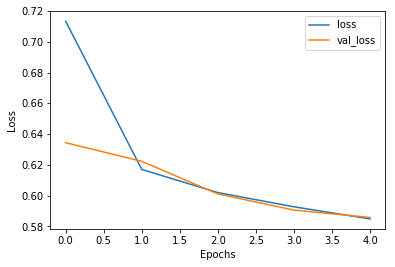

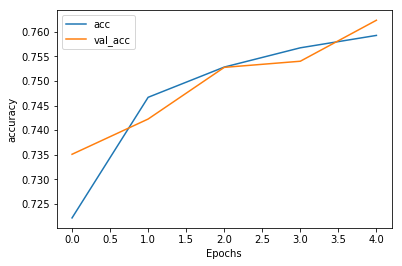

In [13]:
losses=history['loss']
val_losses=history['val_loss']
ac=history['acc']
val_ac=history['val_acc']

import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(ac)
plt.plot(val_ac)
plt.legend(['acc','val_acc'])

# =============================================================================
# 
# Evaluation
# =============================================================================

predicted_labels=myModel.predict(X_test)
#plt.imshow (test_images[0],cmap='binary')
test_loss,test_acc=myModel.evaluate(X_test,y_test)

In [14]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  0.6026631363868713 acc =  0.7606
